## Imports para os modelos

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, ElasticNet, RidgeClassifierCV, LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.linear_model import lasso_path, enet_path
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
import plotnine as pn

#import tensorflow as tf
import numpy as np
import itertools

## Preparo dos dados

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.datasets import make_imbalance
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score, validation_curve
%matplotlib inline

# Carregando os dados a partir do csv
data1 = pd.read_csv("data/student-mat.csv")
data2 = pd.read_csv("data/student-por.csv")
data = pd.concat([data1,data2], ignore_index=True)

In [31]:
#data["Index"] =  range(1, len(data) + 1)

In [239]:
data

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0     ...      4        3      4     1     1      3        6   5   6   6  
1     ...      5        3      3     1     1      3        4   5   5   6  
2     ...      4        3      2     2     3      3       10   7   8  10  
3     ...      3        2      2     1     1      5        2  15  14  15  
4     ...      4        3      2     1     2      5        4   6  10  10  
...   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
1039  ...      5        4      2     1     2      5        4  10  11  10  
1040  ...      4        3      4     1     1      1        4  15  15  16  
1041  ...      1        1      1     1     1      5        6  11  12   9  
1042  ...      2        4      5     3     4      2        6  10  10  10  
1043  ...      4        4      1     3     4      5        4  10  11  11  

[1044 rows x 33 columns]

In [240]:
data_img = data.copy()
data_img.loc[(data_img.Dalc < 2), 'Dalc' ] = 0
data_img.loc[(data_img.Dalc >= 2), 'Dalc' ] = 1 

data_img.loc[(data_img.Walc < 2), 'Walc' ] = 0
data_img.loc[(data_img.Walc >= 2), 'Walc' ] = 1

data_img.loc[(data_img.Dalc ==0), 'Dalc' ] = "Não bebe"
data_img.loc[(data_img.Dalc == 1), 'Dalc' ] = "Bebe"

data_img.loc[(data_img.Walc ==0), 'Walc' ] = "Não bebe"
data_img.loc[(data_img.Walc == 1), 'Walc' ] = "Bebe"
data_img

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0        GP   F   18       U     GT3       A     4     4   at_home   teacher   
1        GP   F   17       U     GT3       T     1     1   at_home     other   
2        GP   F   15       U     LE3       T     1     1   at_home     other   
3        GP   F   15       U     GT3       T     4     2    health  services   
4        GP   F   16       U     GT3       T     3     3     other     other   
...     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
1039     MS   F   19       R     GT3       T     2     3  services     other   
1040     MS   F   18       U     LE3       T     3     1   teacher  services   
1041     MS   F   18       U     GT3       T     1     1     other     other   
1042     MS   M   17       U     LE3       T     3     1  services  services   
1043     MS   M   18       R     LE3       T     3     2  services     other   

      ... famrel freetime  goout      Dalc      Walc health absences  G1  G2  \
0     ...      4        3      4  Não bebe  Não bebe      3        6   5   6   
1     ...      5        3      3  Não bebe  Não bebe      3        4   5   5   
2     ...      4        3      2      Bebe      Bebe      3       10   7   8   
3     ...      3        2      2  Não bebe  Não bebe      5        2  15  14   
4     ...      4        3      2  Não bebe      Bebe      5        4   6  10   
...   ...    ...      ...    ...       ...       ...    ...      ...  ..  ..   
1039  ...      5        4      2  Não bebe      Bebe      5        4  10  11   
1040  ...      4        3      4  Não bebe  Não bebe      1        4  15  15   
1041  ...      1        1      1  Não bebe  Não bebe      5        6  11  12   
1042  ...      2        4      5      Bebe      Bebe      2        6  10  10   
1043  ...      4        4      1      Bebe      Bebe      5        4  10  11   

      G3  
0      6  
1      6  
2     10  
3     15  
4     10  
...   ..  
1039  10  
1040  16  
1041   9  
1042  10  
1043  11  

[1044 rows x 33 columns]

Por ter muitos atributos e poucos dados, acabamos por filtrar os dados em alguns poucos atributos que continham uma maior correlação com o 'target' em questão: a bebida. Acabamos com 6 atributos: gênero, tempo livre, guardião legal, o costume de sair de casa e a quantidade de faltas na escola. 

Filtramos também os dados originais que tinham 5 níveis de quão inclinado a beber estava o aluno durante dois cenários: durante semana e aos fins de semana. Deixamos iguais a 0 os que escolheram o mínimo e 1 os que escolheram qualquer coisa diferente disto.

In [226]:
#data_img = data.copy()
data = data[["sex","freetime","famrel","studytime","goout","Walc","Dalc","absences",]]
clean_data = pd.get_dummies(data, drop_first=True)

dalc = clean_data.copy()
walc = clean_data.copy()

dalc.loc[(dalc.Dalc < 2), 'Dalc' ] = 0 
dalc.loc[(dalc.Dalc >= 2), 'Dalc' ] = 1 

walc.loc[(walc.Walc < 2), 'Walc' ] = 0 
walc.loc[(walc.Walc >= 2), 'Walc' ] = 1

In [106]:
data_model = dalc.drop('Walc', axis=1)
data_model_2 = walc.drop('Dalc', axis=1)

X = data_model.drop('Dalc', axis=1)
y = data_model['Dalc']

X_2 = data_model_2.drop('Walc', axis=1)
y_2 = data_model_2["Walc"]

In [250]:
X_2["index"] =range(1, len(X_2) + 1)

In [39]:
dalc["Dalc"].value_counts()

0    727
1    317
Name: Dalc, dtype: int64

In [53]:
walc["Walc"].value_counts()

1    646
0    398
Name: Walc, dtype: int64

In [108]:
#X_2["Index"] =  range(1, len(data) + 1)

In [278]:
#USANDO WALC X_2
dataframe1, targets = make_imbalance(X_2, y_2,sampling_strategy={0: 398, 1: 420} ,random_state=10) #, sampling_strategy={0: 1500, 1: 1500, 2: 1500, 3: 1500},random_state=14)
#data_img, targets1 = make_imbalance(X_2, y_2,sampling_strategy={0: 398, 1: 420} ,random_state=10)
#data_img1 = pd.concat([data_img, pd.DataFrame({'targets':targets1})])

In [279]:
indices = dataframe1["index"]

In [280]:
dataframe1

freetime  famrel  studytime  goout  absences  sex_M  index
0           3       4          4      2         0      0    854
1           2       3          3      3         4      0    264
2           3       5          2      3         0      0    894
3           4       5          3      5         2      0    505
4           1       4          3      2         0      0    112
..        ...     ...        ...    ...       ...    ...    ...
813         3       4          1      3         5      0    936
814         4       3          2      5         4      1    840
815         4       4          1      4         6      1    560
816         3       4          1      3         8      1    588
817         3       4          2      3         0      0    790

[818 rows x 7 columns]

In [281]:
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(dataframe1.drop("index",axis = 1))
dataframe = pd.DataFrame(X1, columns = ["freetime","famrel","studytime","goout","absences","sex_M"])#data.drop(["Walc","Dalc"],axis=1).columns)

In [282]:
dataframe["index"] = indices

In [283]:
dataframe

freetime  famrel  studytime  goout  absences  sex_M  index
0         0.0     0.0        2.0   -0.5 -0.333333    0.0    854
1        -1.0    -1.0        1.0    0.0  0.333333    0.0    264
2         0.0     1.0        0.0    0.0 -0.333333    0.0    894
3         1.0     1.0        1.0    1.0  0.000000    0.0    505
4        -2.0     0.0        1.0   -0.5 -0.333333    0.0    112
..        ...     ...        ...    ...       ...    ...    ...
813       0.0     0.0       -1.0    0.0  0.500000    0.0    936
814       1.0    -1.0        0.0    1.0  0.333333    1.0    840
815       1.0     0.0       -1.0    0.5  0.666667    1.0    560
816       0.0     0.0       -1.0    0.0  1.000000    1.0    588
817       0.0     0.0        0.0    0.0 -0.333333    0.0    790

[818 rows x 7 columns]

### A ideia até agora é: conseguir os indices, advindos da primeira parte da divisão de dados, para conseguir trabalhar com estes quando formos fazer visualizações e afins.

In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(dataframe,targets, test_size=0.2, random_state = 13)  

In [294]:
indices_treino = X_train["index"]
indices_teste = X_test["index"]
X_train = X_train.drop("index",axis = 1)
X_test = X_test.drop("index",axis = 1)

## Criação dos modelos

In [295]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
def clf_eval(clf, X, y_true, classes=['Não bebe', 'Bebe']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    #print('Classification Report')
    #print(classification_report(y_true, y_pred, target_names=classes))
    #print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    #print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    #print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    #print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    #plott = plot_confusion_matrix(clf_matrix, classes=classes)
    plot_confusion_matrix(clf_matrix, classes=classes)
    return [roc_auc_score(y_true, y_pred)] #, plott]

Confusion matrix, without normalization
[[58 23]
 [24 59]]


[0.7134463781050127]

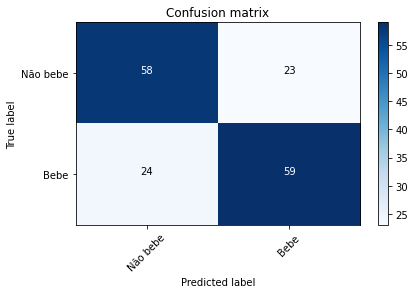

In [296]:
#RIDGE CLASSIFIER
ridgecv = RidgeClassifierCV().fit(X_train, Y_train)
y_pred_ = ridgecv.predict(X_test)
ridgecv.score(X_test, Y_test)
clf_eval(ridgecv, X_test, Y_test)

Confusion matrix, without normalization
[[57 24]
 [24 59]]


[0.7072735385988398]

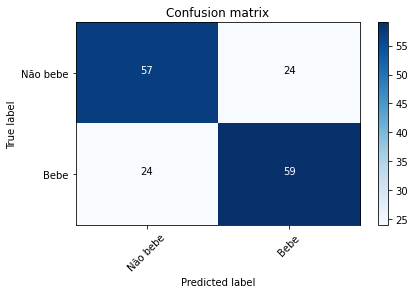

In [297]:
#REGRESSÃO LOGÍSTICA
logisR = LogisticRegression().fit(X_train, Y_train)
y_pred = logisR.predict(X_test)
logisR.score(X_test, Y_test)
clf_eval(logisR, X_test, Y_test)


Confusion matrix, without normalization
[[77  4]
 [64 19]]


[0.5897664733006098]

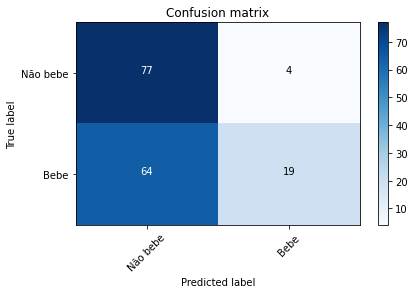

In [298]:
#PERCEPTRON
percep = Perceptron().fit(X_train, Y_train)
y_pred = percep.predict(X_test)
percep.score(X_test, Y_test)
clf_eval(percep, X_test, Y_test)

Confusion matrix, without normalization
[[13 68]
 [10 73]]


[0.5200059497248253]

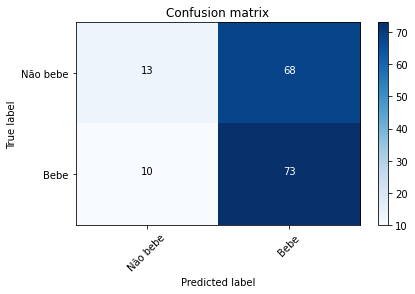

In [299]:
#PASSIVE AGRESSIVE ALGORITHM
PAC = PassiveAggressiveClassifier().fit(X_train,Y_train)
#y_pred = PAC.predict(X_test)
PAC.score(X_test, y_pred)
clf_eval(PAC, X_test, Y_test)

Confusion matrix, without normalization
[[64 17]
 [32 51]]


[0.7022906440577122]

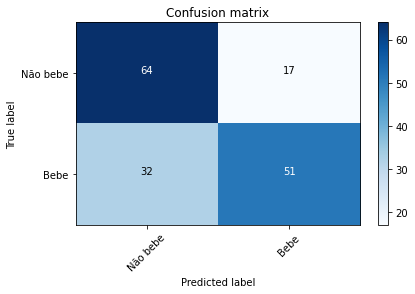

In [300]:
#DECISION TREE
DTC = DecisionTreeClassifier().fit(X_train,Y_train)
y_pred = DTC.predict(X_test)
DTC.score(X_test, Y_test)
clf_eval(DTC, X_test, Y_test)

Confusion matrix, without normalization
[[61 20]
 [28 55]]


[0.7078685110813625]

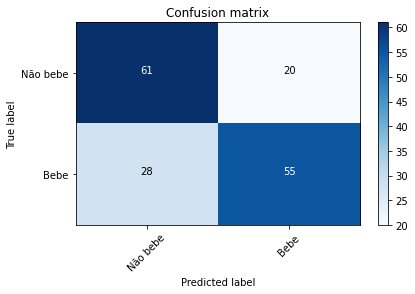

In [301]:
#RANDOM FOREST
RFC = RandomForestClassifier().fit(X_train,Y_train)
y_pred = RFC.predict(X_test)
RFC.score(X_test, Y_test)
clf_eval(RFC, X_test, Y_test)

## Imagens
Escolhemos dois modelos para fazer parte da entrega: Random Forest e Ridge Classifier(que pode ser substituído pelo Logistic Regression).

Em geral, quando não especificado, usamos os dados de bebida pelos alunos aos finais de semana pois, além de termos treinado os modelos com estes dados, temos melhores visualizações e espaçamento dos dados visualmente, porém temos alguns gráficos que fazem esta comparação. 

In [17]:
# "sex","freetime","famrel","studytime","goout","Walc","Dalc","absences"

In [200]:
from plotnine import *
import plotly.express as px

In [472]:
len(data_img[data_img["freetime"] == 1][data_img["Dalc"] == "Bebe"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



15

In [471]:
len(data_img[data_img["freetime"] == 2][data_img["Dalc"] == "Bebe"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



38

In [470]:
len(data_img[data_img["freetime"] == 3][data_img["Dalc"] == "Bebe"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



108

In [476]:
len(data_img[data_img["freetime"] == 4][data_img["Dalc"] == "Bebe"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



113

In [478]:
len(data_img[data_img["freetime"] == 5][data_img["Dalc"] == "Bebe"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



43

Podemos ver aqui, que temos uma maior concentração de jovens com um tempo livre entre maior do que 2 (nos dados, cada um destes corresponde a horas livres por dia), e não conseguimos observar uma relação direta entre o fato do jovem beber e a quantidade de tempo livre deste. Vale salientar que consideramos aqui os dados relacionados a beber durante semana. 

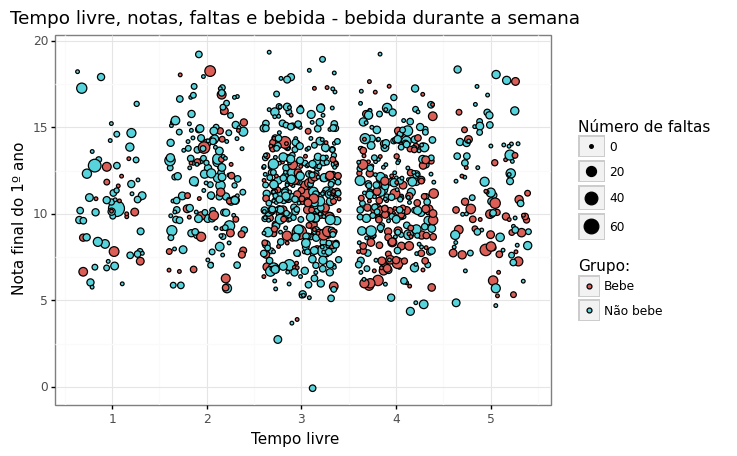

<ggplot: (-9223371893978148224)>

In [483]:
(ggplot(data = data_img) + aes(x = data_img["freetime"],y = data_img["G1"], size = data_img["absences"], fill = data_img["Dalc"], group = 'factor(data_img["Dalc"])') + geom_jitter() #+ geom_point() 
) + ggtitle("Tempo livre, notas, faltas e bebida - bebida durante a semana") +labs(x="Tempo livre", y = "Nota final do 1º ano", size = "Número de faltas", fill = "Grupo:") +theme_bw()


Nestes histogramas podemos ver a diferença entre a quantidade de jovens que bebem aos finais de semana e a quantidade dos que bebem inclusive durante semana relacionados com o tempo de estudo diário. Podemos ver que, nos dados durante semana, estes se fazem uma minoria em todos as quantidades de horas estudadas, mas se fazem mais presentes nos dados de final de semana.

Podemos apontar que apresentam participação bem considerável nos que menos estudam(no tempo de estudo igual a 1, em geral), em ambos conjuntos de dados, e menos presentes nos que mais estudam, não sendo maioria em nenhum dos casos.

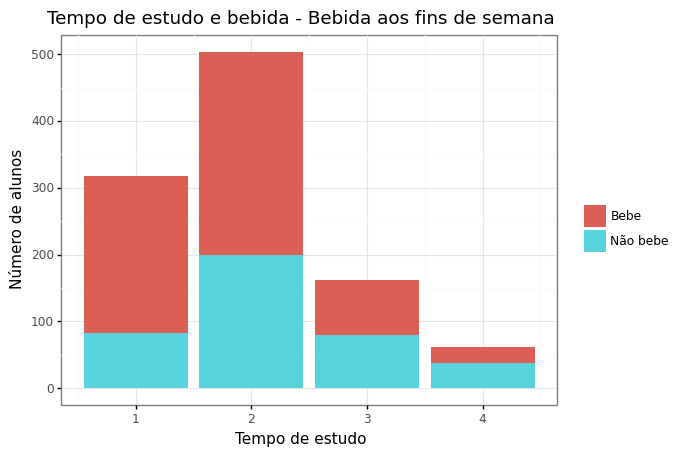

<ggplot: (-9223371893973751768)>

In [432]:
(ggplot(data = data_img) + aes(x = data_img["studytime"], fill = data_img["Walc"]) + geom_bar() 
)+ labs(x = "Tempo de estudo", y = "Número de alunos", fill= "") +theme_bw() + ggtitle("Tempo de estudo e bebida - Bebida aos fins de semana")
 #geom_segment(aes(x = 5, y = 30, xend = 3.5, yend = 25),
 #                 arrow = arrow(length = 'unit(0.5, "cm")')))

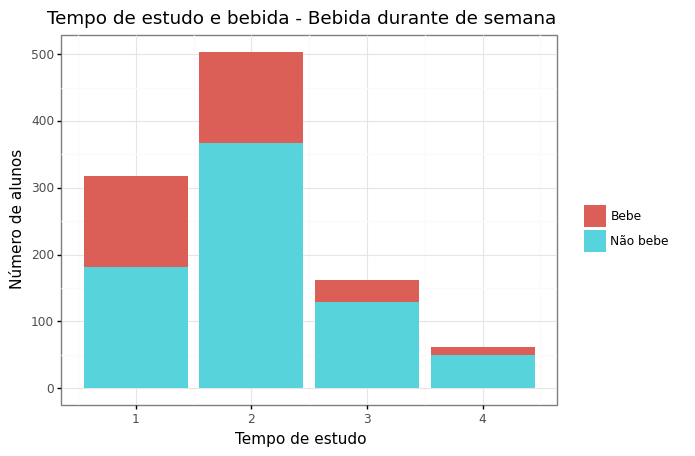

<ggplot: (-9223371893974605020)>

In [484]:
(ggplot(data = data_img) + aes(x = data_img["studytime"], fill = data_img["Dalc"]) + geom_bar() 
)+ labs(x = "Tempo de estudo", y = "Número de alunos", fill= "") +theme_bw() + ggtitle("Tempo de estudo e bebida - Bebida durante de semana")

Nestes gráficos boxplots temos a separação em dois grupos, os que bebem durante semana e os que não bebem, relacionando com as notas de primeiro e terceiro do ensino médio. Podemos ver que a mediana e os valores máximos são maiores nos que não bebem, em ambos os gráficos, enquanto números consideravelmente altos nos que bebem são considerados outliers. 

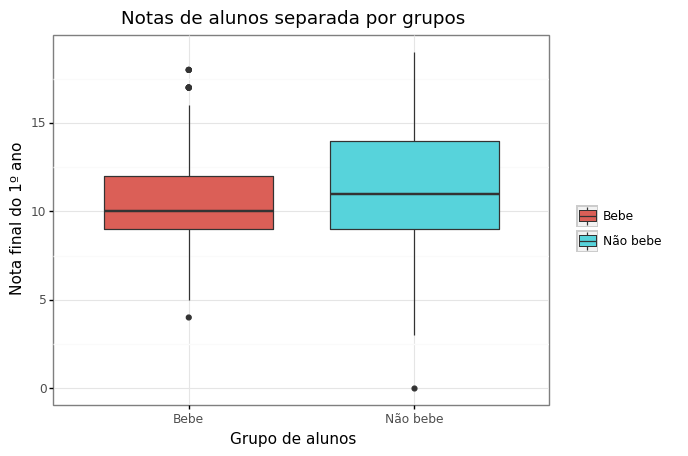

<ggplot: (-9223371893978086972)>

In [490]:
(ggplot(data = data_img) + aes( x= data_img["Dalc"],y = data_img["G1"],
                               fill = data_img["Dalc"]) + geom_boxplot() ) +labs(x = "Grupo de alunos", y = "Nota final do 1º ano", fill = "") +theme_bw()+ ggtitle("Notas de alunos separada por grupos")

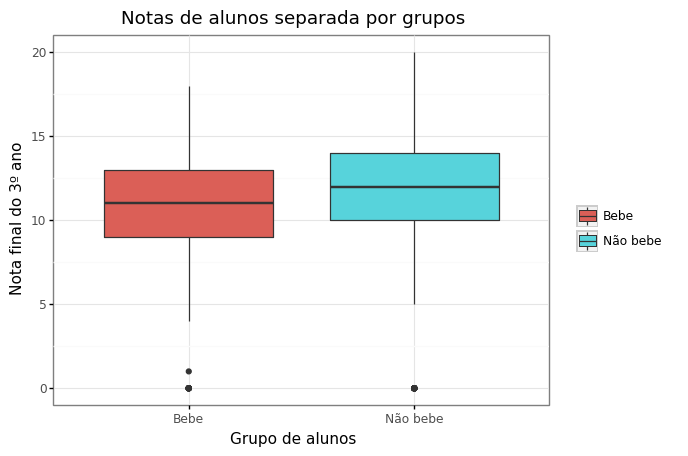

<ggplot: (-9223371893974385284)>

In [491]:
(ggplot(data = data_img) + aes( x= data_img["Dalc"],y = data_img["G3"],
                               fill = data_img["Dalc"]) + geom_boxplot() ) +labs(x = "Grupo de alunos", y = "Nota final do 3º ano", fill = "") +theme_bw()+ ggtitle("Notas de alunos separada por grupos")

## Comparação entre modelo e dados reais

Nestas comparações, pegamos apenas as observações separadas no conjunto de teste e fizemos gráficos separados para os dados reais observados e os dados previsto pelos modelos. Escolhemos dois que tiveram o melhor desempenho: o Random Forest e o regressão logística.

Em todos estes estão sendo comparados com os dados reais da bebida nos finais de semana tendo em vista que os modelos foram treinados com estes dados.

### Random Forest

In [320]:
random_forest_results = RFC.predict(X_test)

In [312]:
indices_teste = list(indices_teste)
for i in range(len(indices_teste)):
    indices_teste[i] = indices_teste[i] - 1

In [321]:
data_img_RFC = data_img.filter(items = indices_teste, axis = 0)
data_img_RFC["RFC_Results"] = random_forest_results

In [322]:
data_img_RFC.loc[(data_img_RFC.RFC_Results ==0), 'RFC_Results' ] = "Não bebe"
data_img_RFC.loc[(data_img_RFC.RFC_Results == 1), 'RFC_Results' ] = "Bebe"

In [373]:
data_img_RFC.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'RFC_Results'],
      dtype='object')

### Neste gráfico podemos ver que, apesar de parecido na maioria das horas de estudo (1, 4 e 5 horas), se distanciou da da imagem real nas horas 2 e 3.

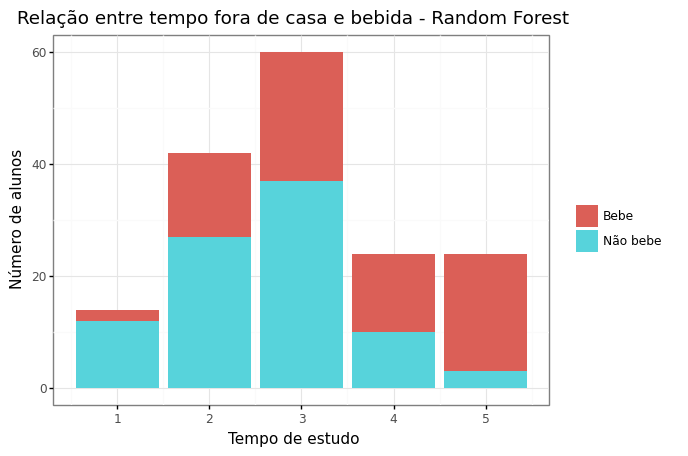

<ggplot: (-9223371893977888244)>

In [441]:
(ggplot(data = data_img_RFC) + aes(x = data_img_RFC["goout"], fill = data_img_RFC["RFC_Results"], group = 'factor(data_img_RFC["RFC_Results"])') + geom_bar() 
)+ labs(x = "Tempo de estudo", y = "Número de alunos", fill= "") +theme_bw() + ggtitle("Relação entre tempo fora de casa e bebida - Random Forest")

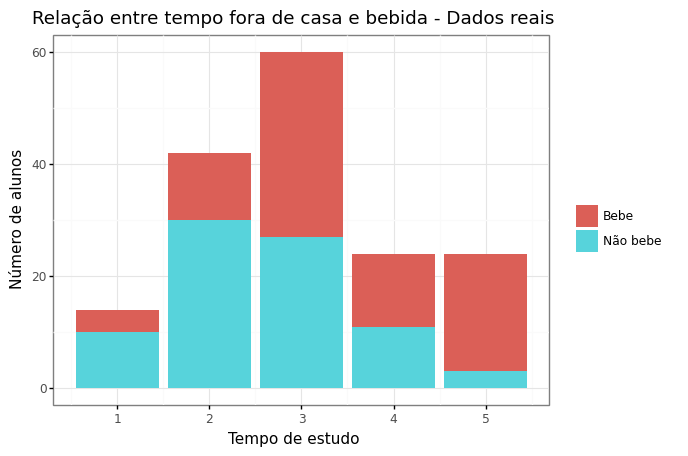

<ggplot: (-9223371893970958340)>

In [442]:
(ggplot(data = data_img_RFC) + aes(x = data_img_RFC["goout"], fill = data_img_RFC["Walc"], group = 'factor(data_img_RFC["Walc"])') + geom_bar() 
)+ labs(x = "Tempo de estudo", y = "Número de alunos", fill= "") +theme_bw() + ggtitle("Relação entre tempo fora de casa e bebida - Dados reais")

### Podemos ver que, em relação a sexo, há algumas discrepâncias consideráveis quando olhamos para o sexo feminino, que possui uma barrinha vermelha menos volumosa nas predições do que nos dados reais.

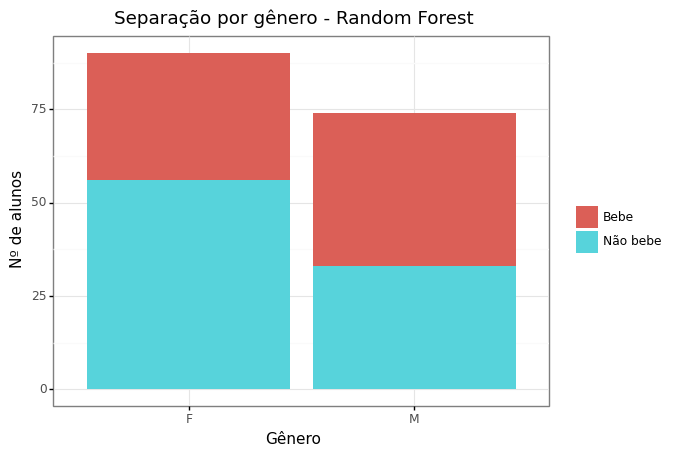

<ggplot: (-9223371893971653296)>

In [440]:
(ggplot(data = data_img_RFC) + aes(x = data_img_RFC["sex"], fill = data_img_RFC["RFC_Results"], group = 'factor(data_img_RFC["RFC_Results"])') + geom_bar() #+ geom_point() 
) + ggtitle("Separação por gênero - Random Forest") +theme_bw() + labs(x = "Gênero", y = "Nº de alunos", fill = "")


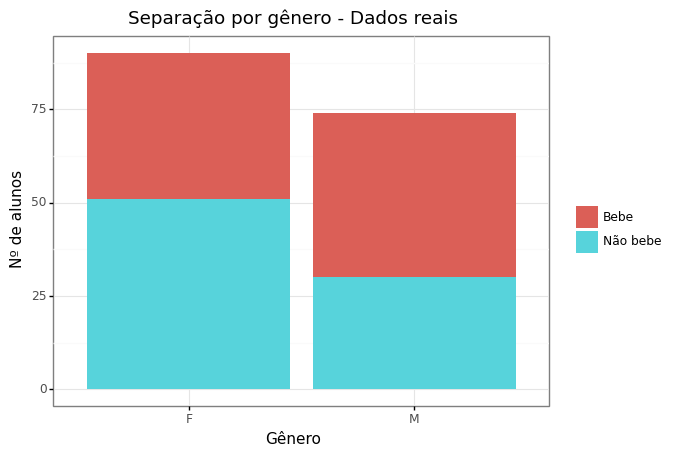

<ggplot: (-9223371893975385436)>

In [406]:
(ggplot(data = data_img_RFC) + aes(x = data_img_RFC["sex"], fill = data_img_RFC["Walc"], group = 'factor(data_img_RFC["Walc"])') + geom_bar() #+ geom_point() 
) + ggtitle("Separação por gênero - Dados reais") +theme_bw()+ labs(x = "Gênero", y = "Nº de alunos", fill = "")


### Neste percebemos que, visualmente, não conseguimos observar nenhuma grande discrepância, conseguindo o modelo prever bem.

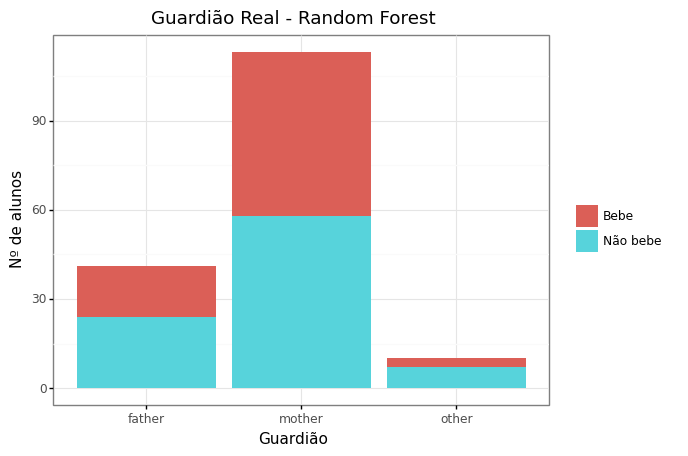

<ggplot: (-9223371893977891908)>

In [500]:
(ggplot(data = data_img_RFC)  +aes(x = data_img_RFC["guardian"], fill = data_img_RFC["RFC_Results"]) + geom_bar() ) + ggtitle("Guardião Real - Random Forest")+ theme_bw() + labs(x = "Guardião", y = "Nº de alunos", fill = "")

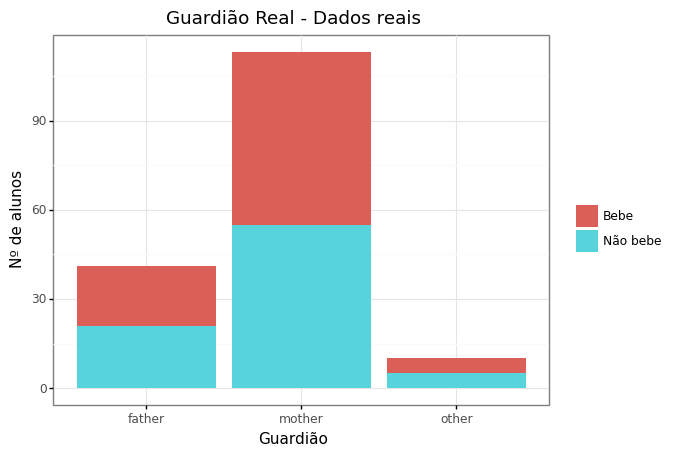

<ggplot: (-9223371893975381104)>

In [497]:
(ggplot(data = data_img_RFC) + aes(x = data_img_RFC["guardian"], fill = data_img_RFC["Walc"]) + geom_bar() ) + labs(x = "Guardião", y = "Nº de alunos", fill = "")+ ggtitle("Guardião Real - Dados reais") + theme_bw()

### Logistic Regression

In [310]:
logistic_regression_results = logisR.predict(X_test)

In [314]:
data_img_LG = data_img.filter(items = indices_teste, axis = 0)
data_img_LG["LG_Results"] = logistic_regression_results

In [317]:
data_img_LG.loc[(data_img_LG.LG_Results ==0), 'LG_Results' ] = "Não bebe"
data_img_LG.loc[(data_img_LG.LG_Results == 1), 'LG_Results' ] = "Bebe"

### Neste gráfico, podemos ver que as discrepâncias mais aparentes estão nas 1, 4 e 5, justamente as que no Random Forest não foram tão afetadas

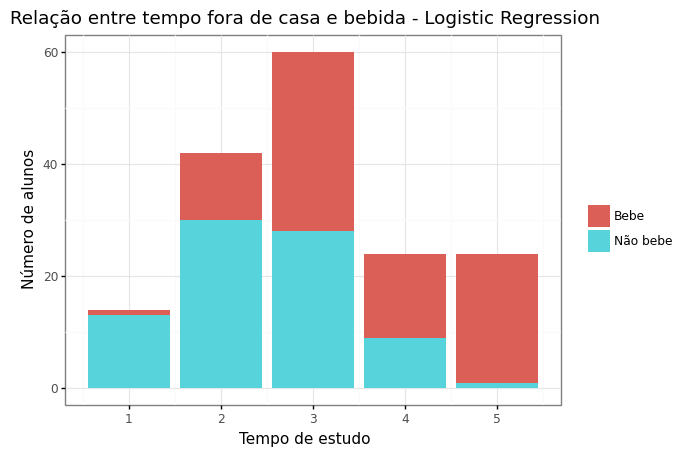

<ggplot: (-9223371893971569428)>

In [435]:
(ggplot(data = data_img_LG) + aes(x = data_img_LG["goout"], fill = data_img_LG["LG_Results"]) + geom_bar() 
)+ labs(x = "Tempo de estudo", y = "Número de alunos", fill= "") +theme_bw() + ggtitle("Relação entre tempo fora de casa e bebida - Logistic Regression")

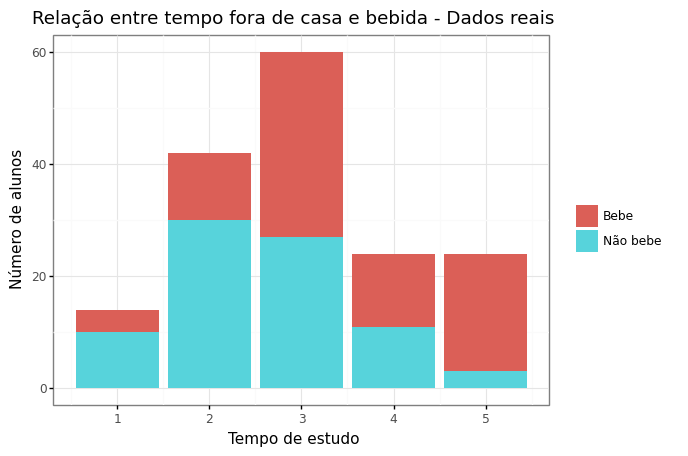

<ggplot: (-9223371893972125684)>

In [436]:
(ggplot(data = data_img_LG) + aes(x = data_img_LG["goout"], fill = data_img_LG["Walc"]) + geom_bar() 
)+ labs(x = "Tempo de estudo", y = "Número de alunos", fill= "") +theme_bw() + ggtitle("Relação entre tempo fora de casa e bebida - Dados reais")

### Diferente do modelo Random Forest, neste é evidente a discrepância em ambos os sexos.

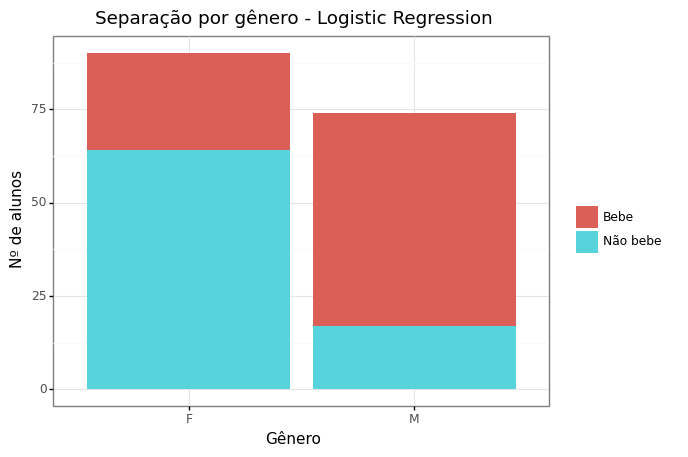

<ggplot: (-9223371893978273788)>

In [410]:
(ggplot(data = data_img_LG) + aes(x = data_img_LG["sex"], fill = data_img_LG["LG_Results"], group = 'factor(data_img_LG["LG_Results"])') + geom_bar() #+ geom_point() 
) + ggtitle("Separação por gênero - Logistic Regression")+theme_bw()+ labs(x = "Gênero", y = "Nº de alunos", fill = "")


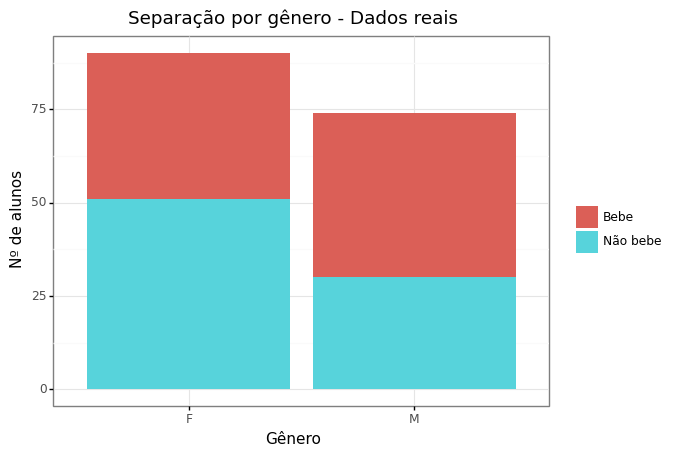

<ggplot: (-9223371893974987188)>

In [409]:
(ggplot(data = data_img_LG) + aes(x = data_img_LG["sex"], fill = data_img_LG["Walc"], group = 'factor(data_img_LG["Walc"])') + geom_bar() #+ geom_point() 
) + ggtitle("Separação por gênero - Dados reais")+theme_bw()+ labs(x = "Gênero", y = "Nº de alunos", fill = "")

### Podemos ver que nestes também fica pouco evidente, também, as diferenças dos dados previstos pelo modelo e os dados reais observados.

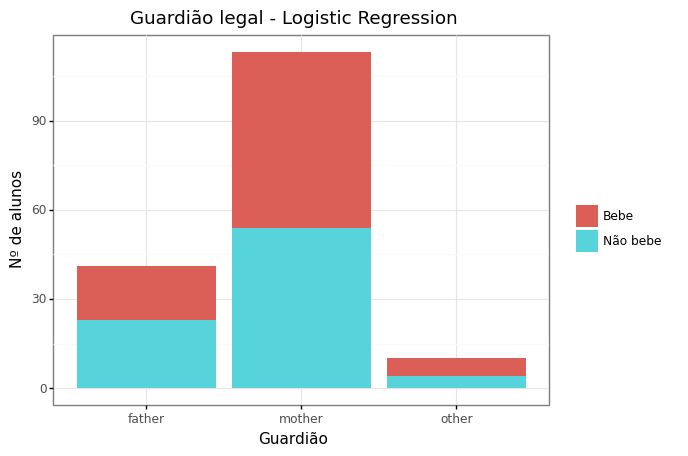

<ggplot: (-9223371893974083332)>

In [502]:
(ggplot(data = data_img_LG) + aes(x = data_img_LG["guardian"], fill = data_img_LG["LG_Results"]) + geom_bar() #+ geom_point() 
) + ggtitle("Guardião legal - Logistic Regression")+ theme_bw() + labs(x = "Guardião", y = "Nº de alunos", fill ="")

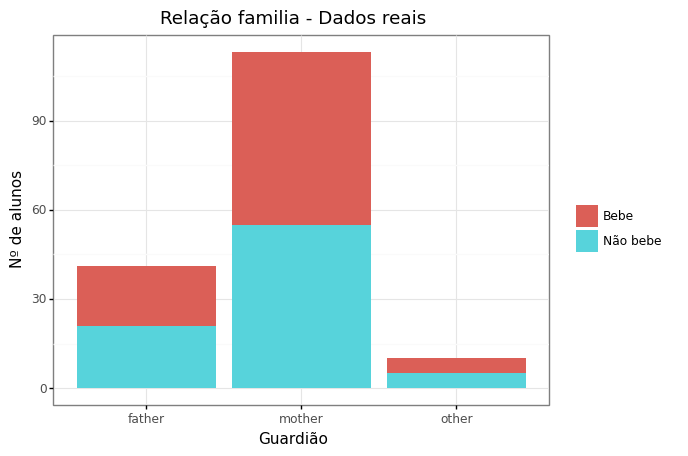

<ggplot: (-9223371893974301420)>

In [503]:
(ggplot(data = data_img_LG) + aes(x = data_img_LG["guardian"], fill = data_img_LG["Walc"]) + geom_bar() #+ geom_point() 
) + ggtitle("Relação familia - Dados reais") + theme_bw()+ labs(x = "Guardião", y = "Nº de alunos", fill ="")